# LAB 1b - ANNDA

In [1]:
import lab1b
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Part 1

## Fitting gaussian clusters

### Define architecture and learning params

In [3]:
# Define Network Architecture
arch = [
    2, # Input dimensionality
    7, # Nodes per hidden layer
    1  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.005
n_epochs = 400

In [4]:

# Create Neural Network object
nn = lab1b.NeuralNetwork(arch, lab1b.activation_fn, lab1b.activation_fn_der, momentum, alpha, lr, n_epochs)

### Define patterns and labels

In [5]:
# Define number of samples
N = 100

In [6]:
mean_A1, mean_A2, cov_A = (-1,0.3), (1,0.3), [[0.2**2, 0], [0, 0.2**2]]
mean_B, cov_B = (0,-0.1), [[0.3**2, 0], [0, 0.3**2]]
X_A, X_B = lab1b.gen_data_clusters(N,mean_A1,mean_A2,cov_A,mean_B,cov_B)


### Random 25% from each class

In [7]:
# Subsample and mix the data
f_A, f_B = 0.75, 0.75
T_train, X_train, T_valid, X_valid = lab1b.subsample_mix_classes(X_A,X_B,f_A,f_B)

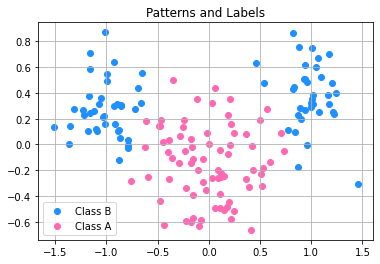

In [8]:
# Plot the patterns and labels
lab1b.plot_data(X_train,T_train)

In [9]:
# Initialize weights matrices
nn.initialize_weights()

In [10]:
# Load training data
nn.training_data(X_train,T_train)

In [11]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 2, Fails = 73, Accuracy = 2.667%
Class B. Hits = 53, Fails = 22, Accuracy = 70.667%
Hits = 55, Fails = 95, Accuracy = 36.667%


In [12]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid)

In [13]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 73, Fails = 2, Accuracy = 97.333%
Class B. Hits = 74, Fails = 1, Accuracy = 98.667%
Hits = 147, Fails = 3, Accuracy = 98.0%


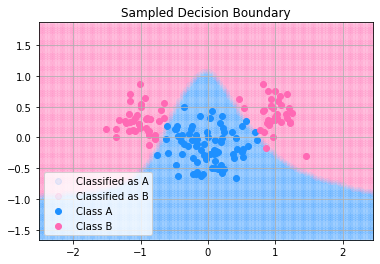

In [14]:
# Plot the sampled decision boundary
K = 100
L = 1
sampling_pattern, boundary_samples = nn.decision_boundary(X_train,K,L)
lab1b.plot_data_boundary(X_train,T_train,sampling_pattern,boundary_samples,L)

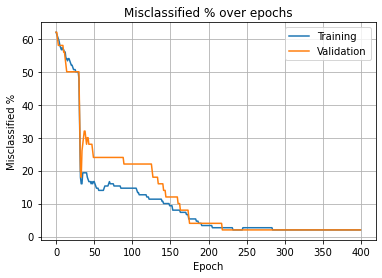

In [15]:
# Plot missclassification
lab1b.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')

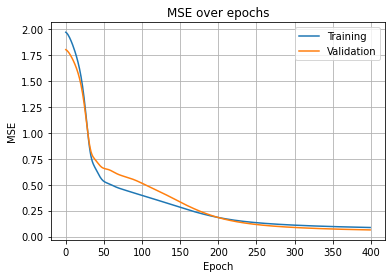

In [16]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')

### 20% from negative x subset of A and 80% positive x subset of A

In [17]:
# Subsample and mix the data
f_A, f_B, f_posneg = 1, 1, 0.2
T_train, X_train, T_valid, X_valid = lab1b.subsample_mix_classes_complex(X_A,X_B,f_A,f_B,f_posneg)

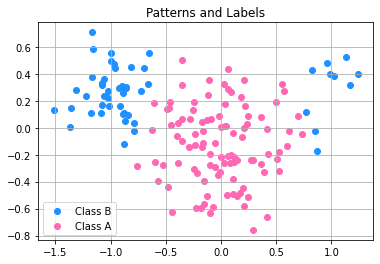

In [18]:
# Plot the patterns and labels
lab1b.plot_data(X_train,T_train)

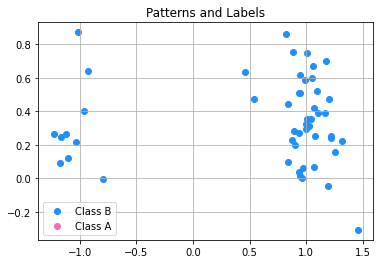

In [19]:
# Plot the patterns and labels
lab1b.plot_data(X_valid,T_valid)

In [20]:
# Initialize weights matrices
nn.initialize_weights()

In [21]:
# Load training data
nn.training_data(X_train,T_train)


In [22]:
T_guessed,accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)


Class A. Hits = 100, Fails = 0, Accuracy = 100.0%
Class B. Hits = 0, Fails = 50, Accuracy = 0.0%
Hits = 100, Fails = 50, Accuracy = 66.667%


In [23]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid)


/home/shared/ANNDA/annda_lab1b/lab1b.py:127: RuntimeWarning: invalid value encountered in long_scalars
  accuracy_neg = round(hits_neg*100/np.shape(T_neg)[0],3)


In [24]:
T_guessed, accuracy_pos, accuracy_neg, accuracy = nn.classify(X_train,T_train,True)

Class A. Hits = 100, Fails = 0, Accuracy = 100.0%
Class B. Hits = 40, Fails = 10, Accuracy = 80.0%
Hits = 140, Fails = 10, Accuracy = 93.333%


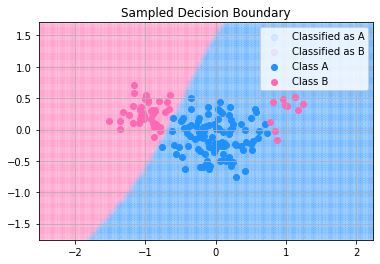

In [25]:
# Plot the sampled decision boundary
K = 100
L = 1
sampling_pattern, boundary_samples = nn.decision_boundary(X_train,K,L)
lab1b.plot_data_boundary(X_train,T_train,sampling_pattern,boundary_samples,L)


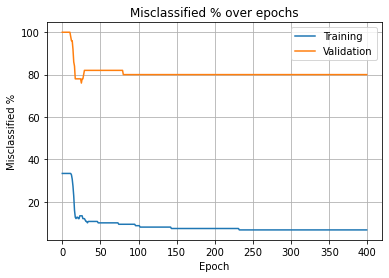

In [26]:
# Plot missclassification
lab1b.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')


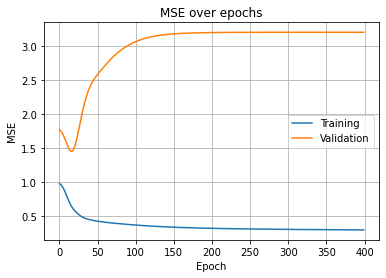

In [27]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')

## Encoder problem

### Define architecture and learning params

In [28]:
# Define Network Architecture
arch = [
    8, # Input dimensionality
    2, # Nodes per hidden layer
    8  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.1
n_epochs = 5000

In [29]:

# Create Neural Network object
nn = lab1b.NeuralNetwork(arch, lab1b.activation_fn, lab1b.activation_fn_der, momentum, alpha, lr, n_epochs)

### Generate data

In [30]:
X_train = np.eye(8)*2 - 1
T_train = X_train
X_valid = X_train
T_valid = T_train

### Train network

In [31]:
# Initialize weights matrices
nn.initialize_weights()


In [32]:
# Load training data
nn.training_data(X_train,T_train)


In [33]:
T_guessed, accuracy = nn.classify_matrix(X_train,T_train,True)


Hits = 0, Fails = 8, Accuracy = 0.0%


In [34]:

epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid,matrix=True)

In [35]:
T_guessed, accuracy = nn.classify_matrix(X_train,T_train,True)

Hits = 8, Fails = 0, Accuracy = 100.0%


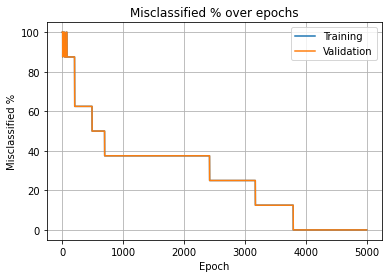

In [36]:
# Plot missclassification
lab1b.plot_error(epoch_errors,epoch_errors_valid,'Misclassified %')


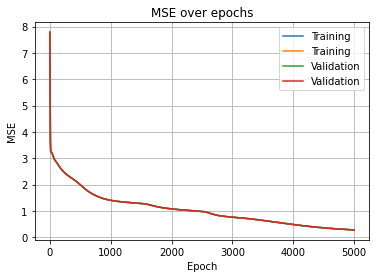

In [37]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')

In [38]:
# Vectorize activation function
i = 1
X_i = np.array([X_train[:,i]]).T
O_i = nn.forward_pass(X_i)
vfunc = np.vectorize(lab1b.activation_fn)
vfunc(nn.forward_mem[0])



array([[-0.44902372],
       [-0.99301506]])

## Function approximation


### Define architecture and learning params


In [39]:
# Define Network Architecture
arch = [
    2, # Input dimensionality
    12, # Nodes per hidden layer
    1  # Output dimensionality
]
momentum = True
alpha = 0.9
lr = 0.05
n_epochs = 200


In [40]:
# Create Neural Network object
nn = lab1b.NeuralNetwork(arch, lab1b.activation_fn, lab1b.activation_fn_der, momentum, alpha, lr, n_epochs)

### Generate data

In [41]:
N = 500
feat_range = [-5,5]
variance = 10 
bias = -0.5
noise_variance = 0.05
X,T,X_grid,Y_grid,Z_grid = lab1b.generate_func_approx_data(N,feat_range,variance,bias,noise_variance=noise_variance)

Text(0.5, 0.92, '2D function to be approximated')

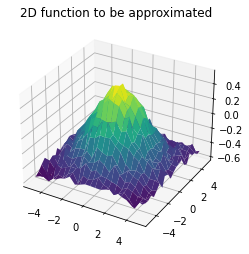

In [42]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D function to be approximated')

In [43]:
# Subsample function data
f = 0.75
X_train, T_train, X_valid, T_valid = lab1b.subsample_function_data(X,T,f)

### Train network

In [44]:
# Initialize weights matrices
nn.initialize_weights()

In [45]:

# Load training data
nn.training_data(X_train,T_train)

In [46]:
epoch_errors, epoch_mses, epoch_errors_valid, epoch_mses_valid = nn.train(X_train,T_train,X_valid,T_valid,matrix=False)

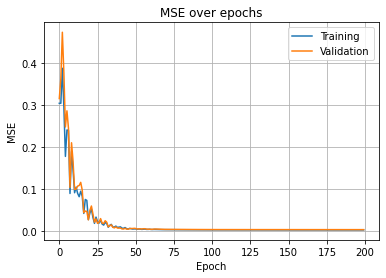

In [47]:
# Plot MSE
lab1b.plot_error(epoch_mses,epoch_mses_valid,'MSE')


In [48]:
# Generate data for plot
Z_grid_guessed = np.reshape(nn.forward_pass(X),(int(np.sqrt(N)),int(np.sqrt(N))))
Z_grid_error = Z_grid_guessed - Z_grid

Text(0.5, 0.92, '2D function approx.')

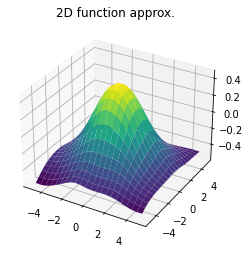

In [49]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid_guessed, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D function approx.')

Text(0.5, 0.92, '2D approx. error')

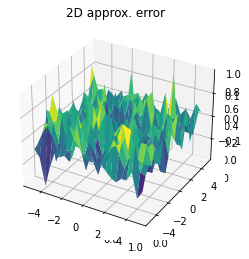

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid_error, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('2D approx. error')

In [51]:
mse_overall = (f*epoch_mses[-1] +  (1-f)*epoch_mses_valid[-1])[0]

# Part 2

In [35]:
beta = 0.2
tau = 25
gamma = 0.1
n = 10
N = 2000
x,X,T = lab1b.gen_mackey_glass_series(beta,tau,gamma,n,N)

In [38]:
X_samples = X[:,301:1501]
T_samples = T[:,301:1501]

In [145]:
X_train = X_samples[:,:500]
X_valid = X_samples[:,500:1000]
X_test = X_samples[:,1000:]
T_train = T_samples[:,:500]
T_valid = T_samples[:,500:1000]
T_test = T_samples[:,1000:]

In [146]:
import torch
from torch import nn
from tqdm import trange

In [147]:
# NEURAL NETWORK CLASS
class NeuralNetwork(nn.Module) :
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size) :
        super(NeuralNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size_1),
            nn.Sigmoid(),
            nn.Linear(hidden_size_1, hidden_size_2),
            nn.Sigmoid(),
            nn.Linear(hidden_size_2, output_size)
        )

    def forward(self, x):
        y = self.linear_relu_stack(x)
        return y
        
    def initialize_weights(self):
        for layer in self.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

    def show(self) :
        print('--------------------------------------------------\n')
        print('Neural Network Description')
        print('Input Layer Neurons = ',self.input_size)
        print('Hidden Layer 1 Neurons = ',self.hidden_size_1)
        print('Hidden Layer 2 Neurons = ',self.hidden_size_2)
        print('Output Layer Neurons = ',self.output_size,'\n')
        print(self)
        print('\n--------------------------------------------------\n')

In [148]:
# Convert data to tensors
X_train_ten = torch.tensor(X_train.T,dtype=torch.float)
T_train_ten = torch.tensor(T_train.T,dtype=torch.float)
X_valid_ten = torch.tensor(X_valid.T,dtype=torch.float)
T_valid_ten = torch.tensor(T_valid.T,dtype=torch.float)

In [149]:
## Create Neural Network
arch1 = [5,3,2,1]
arch2 = [5,4,4,1]
arch3 = [5,5,6,1]
arch = arch1
input_size = arch[0]
hidden_size_1 = arch[1]
hidden_size_2 = arch[2]
output_size = arch[3]
model = NeuralNetwork(input_size, hidden_size_1, hidden_size_2, output_size)

In [150]:
# Define loss and optimizer
lr = 0.001
n_epochs = 3000
mseloss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

In [151]:
mses, mses_valid = [], []
for epoch in range(n_epochs):
    #forward feed
    T_pred_train_ten = model(X_train_ten.requires_grad_())
    #calculate the loss
    loss = mseloss(T_pred_train_ten, T_train_ten)
    mses.append(loss.item())

    #forward validation
    T_pred_valid_ten = model.forward(X_valid_ten)
    #calculate the validation loss
    loss_valid = mseloss(T_pred_valid_ten, T_valid_ten)
    mses_valid.append(loss_valid.item())
    
    #backward propagation: calculate gradients
    loss.backward()
    #update the weights
    optimizer.step()
    #clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()

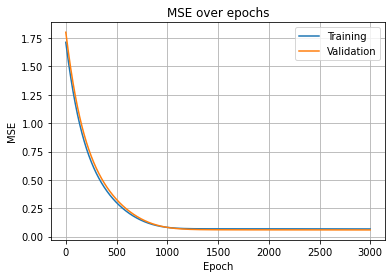

In [152]:
lab1b.plot_error(mses,mses_valid,'MSE')